In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.getcwd()

'/home/vizziwo/otherprojects'

In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.shape

(48842, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.replace('?', np.nan, inplace=True)

In [9]:
df.dropna(inplace=True)

# Correlation 

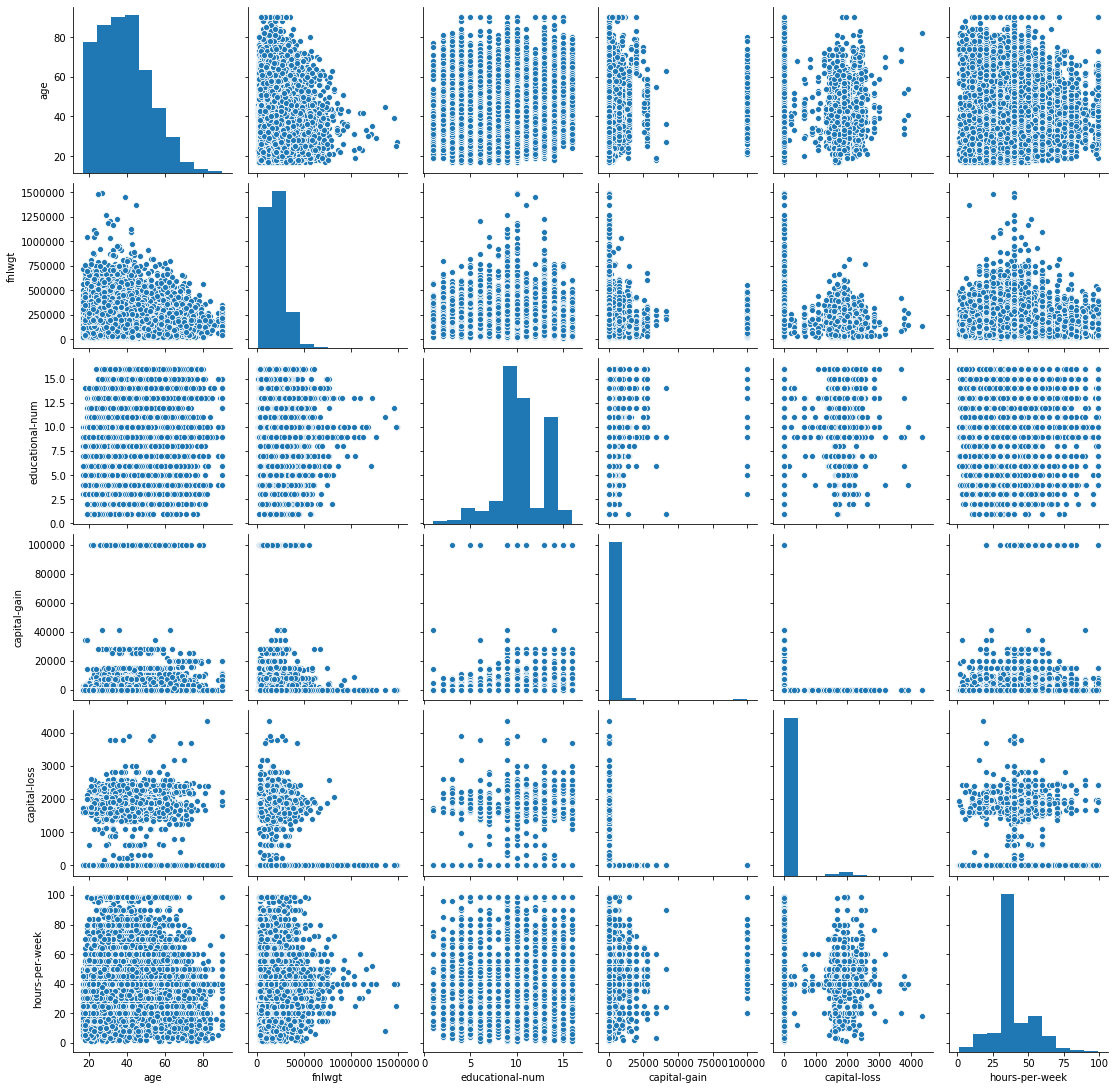

In [10]:
sns.pairplot(df)

In [11]:
df.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [12]:
less = df[df['income']=='<=50K']
more = df[df['income']=='>50K']


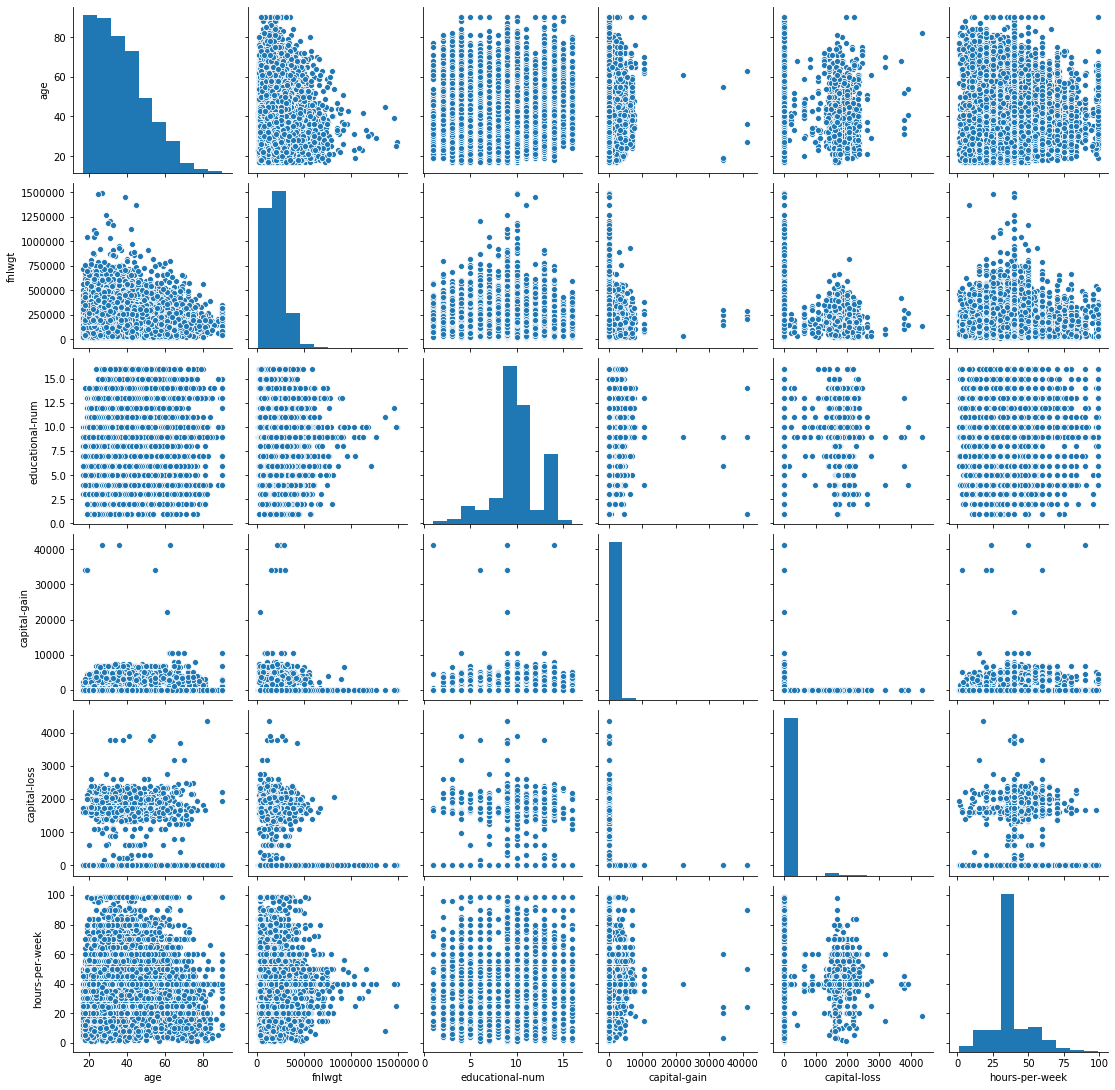

In [38]:
sns.pairplot(less)

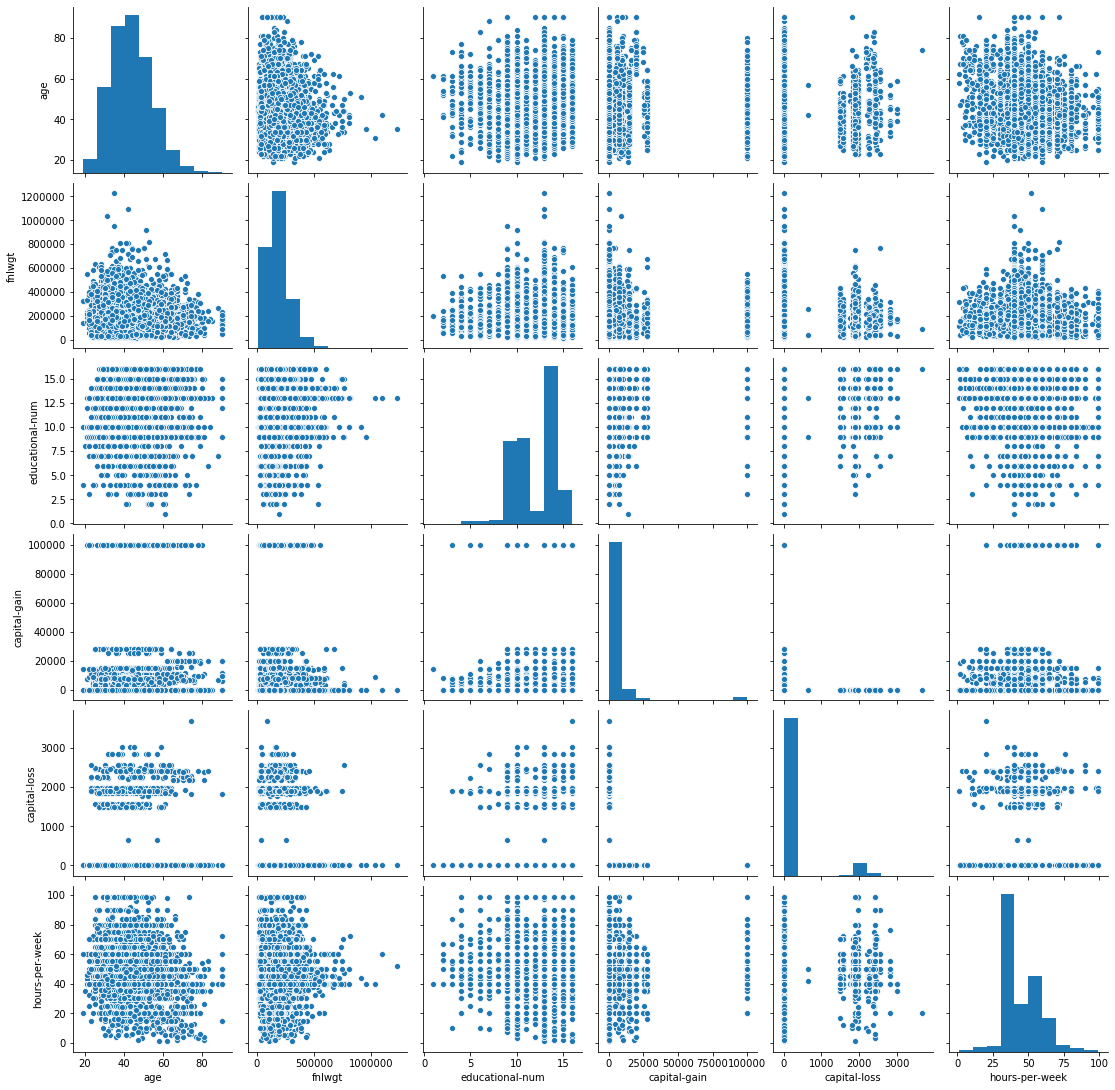

In [39]:
sns.pairplot(more)

I don't see much correlation.

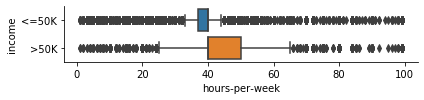

In [48]:
g = sns.catplot(x="hours-per-week", y="income",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
#g.set(xscale="log")

In [21]:
quantile3 = np.quantile(df['hours-per-week'], 0.75)
quantile1 = np.quantile(df['hours-per-week'], 0.25)
iqr = quantile3 - quantile1
iqr

5.0

In [23]:
upper, lower = quantile3 + 1.5*iqr, quantile1 - 1.5*iqr
high_ol, low_ol = df[df['hours-per-week']>upper], df[df['hours-per-week']<lower]

In [30]:
mask = df['income']=='>50K'

In [34]:
high_ol[~mask]

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
27,23,Private,134446,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Male,0,0,54,United-States,<=50K
29,32,Self-emp-not-inc,109282,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,<=50K
54,38,Private,219446,9th,5,Married-spouse-absent,Exec-managerial,Not-in-family,White,Male,0,0,54,Mexico,<=50K
120,31,Local-gov,198770,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,60,United-States,<=50K
173,61,Private,21175,12th,8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48776,26,Private,179010,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,<=50K
48781,34,Private,60567,11th,7,Divorced,Transport-moving,Unmarried,White,Male,0,880,60,United-States,<=50K
48801,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K
48804,30,Private,77266,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,55,United-States,<=50K


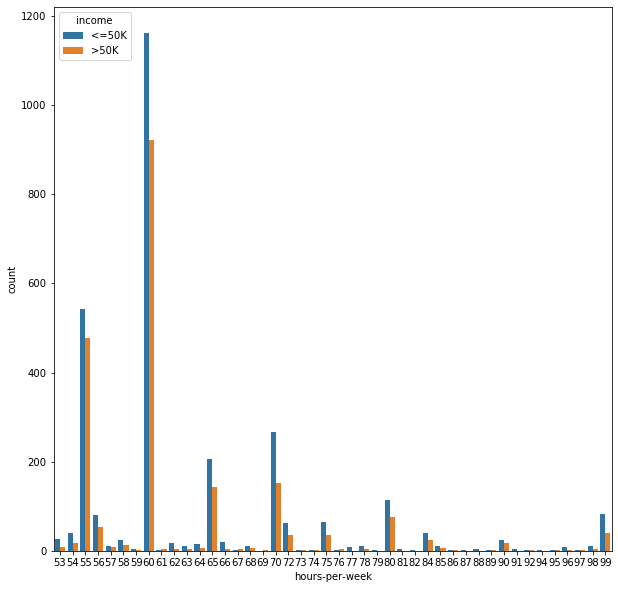

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(high_ol['hours-per-week'], hue=df.income)

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


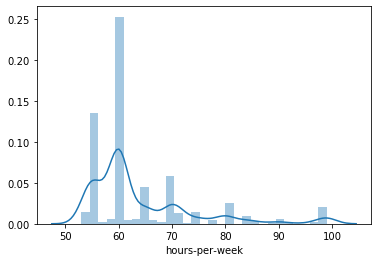

In [32]:
sns.distplot(high_ol[~mask]['hours-per-week'],)

In [19]:
df['hours-per-week'][outliers]

Series([], Name: hours-per-week, dtype: int64)